In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn import metrics, model_selection

In [43]:
df = pd.read_csv("datasets/titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [44]:
# Removing the name column and assigning numerals to Sex column

df = df.drop(columns=["Name"])
df["Sex"] = np.where(df["Sex"]=="male",1,0)
# What if we do the analysis by using dummy variables vis pandas
# df = pd.get_dummies(data=df,drop_first=True)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>,
        <Axes: title={'center': 'Parents/Children Aboard'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

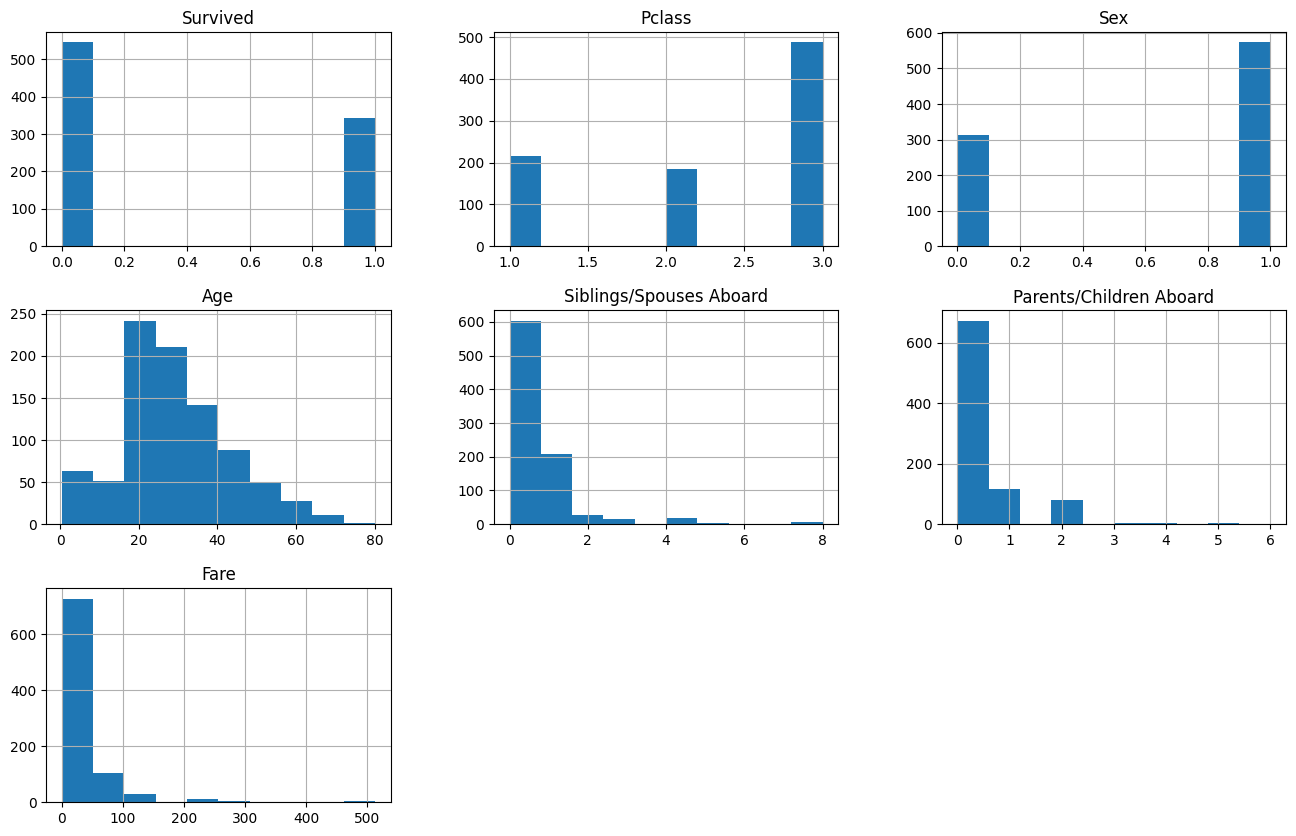

In [45]:
# Histogram

df.hist(figsize=(16,10))

<Axes: >

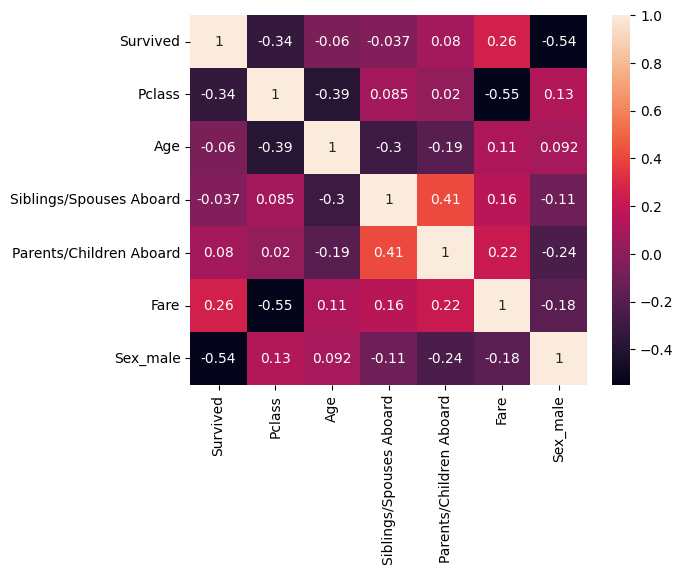

In [35]:
# Heatmap for analysisng strong correlation between various features

sns.heatmap(data=df.corr(),annot=True)

In [46]:
# Spitting the variables
y = df.Survived

X = df.drop(columns=["Survived"])

X = sm.add_constant(X)


In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [48]:
# Running Logistic Regression

model = sm.Logit(endog=y_train,exog=X_train).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.431602
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3440
Time:                        23:40:25   Log-Likelihood:                -306.01
converged:                       True   LL-Null:                       -466.49
Covariance Type:            nonrobust   LLR p-value:                 2.627e-66
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.3200      0.642      8.282      0.000       4.061   

In [49]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
predictions = np.where(predictions>0.5,1,0)
print(classification_report(y_true=y_test,y_pred=predictions))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        97
           1       0.75      0.69      0.72        81

    accuracy                           0.75       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.75      0.75      0.75       178

